# UCI Image Segmentation Data 

#### https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

Data description from https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.names:
1. Title: Image Segmentation data

2. Source Information
   -- Creators: Vision Group, University of Massachusetts
   -- Donor: Vision Group (Carla Brodley, brodley@cs.umass.edu)
   -- Date: November, 1990
 
3. Past Usage: None yet published

4. Relevant Information:

   The instances were drawn randomly from a database of 7 outdoor 
   images.  The images were handsegmented to create a classification
   for every pixel.  

   Each instance is a 3x3 region.

5. Number of Instances: Training data: 210  Test data: 2100

6. Number of Attributes: 19 continuous attributes

7. Attribute Information:

    1.  region-centroid-col:  the column of the center pixel of the region.
    2.  region-centroid-row:  the row of the center pixel of the region.
    3.  region-pixel-count:  the number of pixels in a region = 9.
    4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or equal to 5, go through the region.
    5.  short-line-density-2:  same as short-line-density-5 but counts lines
         of high contrast, greater than 5.
    6.  vedge-mean:  measure the contrast of horizontally
         adjacent pixels in the region.  There are 6, the mean and 
         standard deviation are given.  This attribute is used as
        a vertical edge detector.
    7.  vegde-sd:  (see 6)
    8.  hedge-mean:  measures the contrast of vertically adjacent
          pixels. Used for horizontal line detection. 
    9.  hedge-sd: (see 8).
    10. intensity-mean:  the average over the region of (R + G + B)/3
    11. rawred-mean: the average over the region of the R value.
    12. rawblue-mean: the average over the region of the B value.
    13. rawgreen-mean: the average over the region of the G value.
    14. exred-mean: measure the excess red:  (2R - (G + B))
    15. exblue-mean: measure the excess blue:  (2B - (G + R))
    16. exgreen-mean: measure the excess green:  (2G - (R + B))
    17. value-mean:  3-d nonlinear transformation
         of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
         of Interactive Computer Graphics)
    18. saturatoin-mean:  (see 17)
    19. hue-mean:  (see 17)

8. Missing Attribute Values: None

9. Class Distribution: 

   Classes:  brickface, sky, foliage, cement, window, path, grass.

   30 instances per class for training data.
   300 instances per class for test data.


In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Test set and training set

The data has been separated into training set, with 210 instances (30 instances for each class) in the training set and with 2100 instances (300 instances for each class) in the test set.

In [48]:
train = pd.read_table('Source/segmentation.data',  sep=',', header=2, na_filter=True)
test = pd.read_table('Source/segmentation.test',  sep=',', header=2, na_filter=True)

In [49]:
train.shape

(210, 19)

In [50]:
test.shape

(2100, 19)

In [51]:
train.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
BRICKFACE,140,125,9,0,0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
BRICKFACE,188,133,9,0,0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
BRICKFACE,105,139,9,0,0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
BRICKFACE,34,137,9,0,0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
BRICKFACE,39,111,9,0,0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


Index label column

In [52]:
train.index.name = 'label'
train.reset_index(inplace=True)

test.index.name = 'label'
test.reset_index(inplace=True)

Create array with labels for the test and training data. Drop the label column in the test and train arrays


In [53]:
train_label = train.label
train = train.drop('label', 1)

test_label = test.label
test = test.drop('label', 1)

label = np.unique(test_label)
print "Classes:"
print label

Classes:
['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']


## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train, train_label)

#### Accuracy score

In [55]:
from sklearn import metrics
pred = clf.predict(test)
accuracy = metrics.accuracy_score(test_label, pred)
print "Accuracy:{0:.3f}".format(accuracy)

Accuracy:0.940


#### Classification report

In [56]:
print "Classification report"
print metrics.classification_report(test_label, pred)

Classification report
             precision    recall  f1-score   support

  BRICKFACE       0.97      0.99      0.98       300
     CEMENT       0.90      0.90      0.90       300
    FOLIAGE       0.91      0.83      0.87       300
      GRASS       1.00      1.00      1.00       300
       PATH       0.98      0.99      0.99       300
        SKY       1.00      1.00      1.00       300
     WINDOW       0.82      0.87      0.84       300

avg / total       0.94      0.94      0.94      2100



#### Confusion Matrix

In [57]:
cm = metrics.confusion_matrix(test_label, pred)
print('Confusion matrix, without normalization')
print cm

Confusion matrix, without normalization
[[298   0   0   0   0   0   2]
 [  3 271   3   0   5   0  18]
 [  3  12 249   0   0   0  36]
 [  0   0   1 299   0   0   0]
 [  0   2   0   0 298   0   0]
 [  0   0   0   0   0 300   0]
 [  3  15  22   0   0   0 260]]


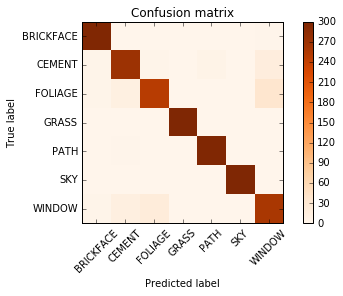

In [58]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(label))
    plt.xticks(tick_marks, label, rotation=45)
    plt.yticks(tick_marks, label)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm)
plt.show()

#### To do: because the data is quite good, I would like to experiment with smaller sets of attributes for random forest


## SVM

In [59]:
from sklearn.svm import SVC

In [60]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))

[ 0.88  0.98  0.98  0.86  0.88]
Mean score: 0.914 (+/-0.026)


### Linear

In [ ]:
svc = SVC(kernel = 'linear')
evaluate_cross_validation(svc, train, train_label, 5)

In [69]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    cm = metrics.confusion_matrix(y_test, y_pred)
    print cm

In [70]:
train_and_evaluate(svc, train, test, train_label, test_label)

Accuracy on training set:
0.985714285714
Accuracy on testing set:
0.941904761905
Classification Report:
             precision    recall  f1-score   support

  BRICKFACE       0.97      0.98      0.97       300
     CEMENT       0.90      0.88      0.89       300
    FOLIAGE       0.88      0.93      0.91       300
      GRASS       1.00      0.99      1.00       300
       PATH       0.96      1.00      0.98       300
        SKY       1.00      1.00      1.00       300
     WINDOW       0.88      0.82      0.85       300

avg / total       0.94      0.94      0.94      2100

Confusion Matrix:
[[293   5   0   0   0   0   2]
 [  6 263   1   0  12   0  18]
 [  0   7 279   0   0   0  14]
 [  0   0   2 298   0   0   0]
 [  0   0   0   0 300   0   0]
 [  0   0   0   0   0 300   0]
 [  3  18  34   0   0   0 245]]


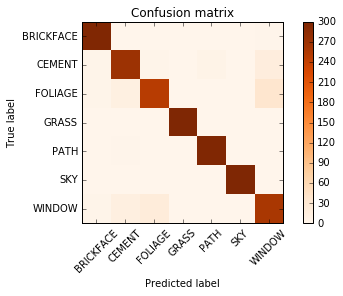

In [71]:
plt.figure()
plot_confusion_matrix(cm)
plt.show()

### Poly

In [64]:
svc_poly = SVC(kernel = 'poly')
evaluate_cross_validation(svc_poly, train, train_label, 5)

[ 0.9   0.88  0.93  0.81  0.81]
Mean score: 0.867 (+/-0.025)


In [65]:
train_and_evaluate(svc_poly, train, test, train_label, test_label)

Accuracy on training set:
1.0
Accuracy on testing set:
0.917619047619
Classification Report:
             precision    recall  f1-score   support

  BRICKFACE       0.88      0.95      0.91       300
     CEMENT       0.86      0.85      0.86       300
    FOLIAGE       0.83      0.92      0.87       300
      GRASS       1.00      0.99      0.99       300
       PATH       0.96      0.98      0.97       300
        SKY       1.00      1.00      1.00       300
     WINDOW       0.90      0.74      0.81       300

avg / total       0.92      0.92      0.92      2100

Confusion Matrix:
[[284   3   2   0   0   0  11]
 [ 20 256   2   0  11   0  11]
 [  9  12 275   0   1   0   3]
 [  0   1   2 296   1   0   0]
 [  0   6   0   0 294   0   0]
 [  0   0   0   0   0 300   0]
 [  8  20  50   0   0   0 222]]


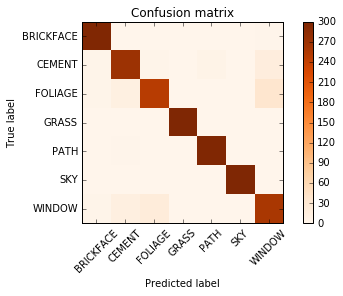

In [66]:
plt.figure()
plot_confusion_matrix(cm)
plt.show()

### RBF

In [67]:
svc_rbf = SVC(kernel = 'rbf')
evaluate_cross_validation(svc_poly, train, train_label, 5)

[ 0.9   0.88  0.93  0.81  0.81]
Mean score: 0.867 (+/-0.025)


In [68]:
train_and_evaluate(svc_poly, train, test, train_label, test_label)

Accuracy on training set:
1.0
Accuracy on testing set:
0.917619047619
Classification Report:
             precision    recall  f1-score   support

  BRICKFACE       0.88      0.95      0.91       300
     CEMENT       0.86      0.85      0.86       300
    FOLIAGE       0.83      0.92      0.87       300
      GRASS       1.00      0.99      0.99       300
       PATH       0.96      0.98      0.97       300
        SKY       1.00      1.00      1.00       300
     WINDOW       0.90      0.74      0.81       300

avg / total       0.92      0.92      0.92      2100

Confusion Matrix:
[[284   3   2   0   0   0  11]
 [ 20 256   2   0  11   0  11]
 [  9  12 275   0   1   0   3]
 [  0   1   2 296   1   0   0]
 [  0   6   0   0 294   0   0]
 [  0   0   0   0   0 300   0]
 [  8  20  50   0   0   0 222]]


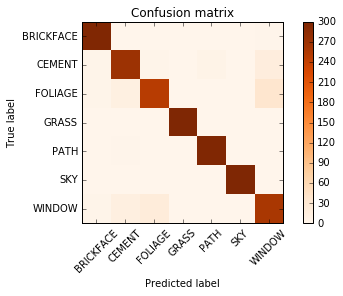

In [44]:
plt.figure()
plot_confusion_matrix(cm)
plt.show()